pip install Keras

In [2]:
pip install pandas-datareader

Note: you may need to restart the kernel to use updated packages.


In [3]:
 import pandas as pd
import numpy as np
import pandas_datareader as pdr
#Collect Apple's Stock Data
key='09dfd36db82b8087f3b269cbb1882a9cf5b3c947'

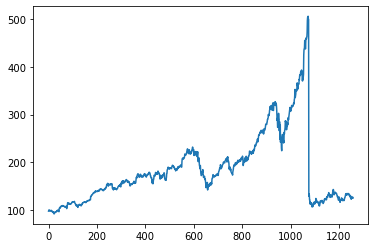

In [4]:
data_frame= pdr.get_data_tiingo("AAPL",api_key=key)
data_frame.to_csv("AAPL.csv")
data_frame_2=data_frame.reset_index()["close"]
data_frame_2[1228:]

df1=data_frame.reset_index()["close"]
df1.shape
(1256,)
import matplotlib.pyplot as plt
plt.plot(df1)

In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))
df1.shape

(1258, 1)

In [6]:
#Categorizing Data into Train data and Test data

training_data=int(len(df1)*0.70) # using 70% os data to train and remaining 30 % to test
testing_data=int(len(df1)*0.3)
train_data,test_data=df1[0:training_data,:],df1[training_data:len(df1),:1]
training_data,testing_data
(879, 376)
len(test_data)

378

In [7]:
#Train the data
import numpy as np
def create_dataset (dataset, time_steps=1):
    dataX, dataY = [] , []
    for i in range(len(dataset)-time_steps-1):
        a= dataset[i:(i+ time_steps) , 0]
        dataX.append(a)
        dataY.append(dataset[i+ time_steps, 0])
    return np.array(dataX),np.array(dataY)
time_steps=100
X_Train, Y_Train = create_dataset (train_data, time_steps)
X_Test, Y_Test = create_dataset (test_data, time_steps)
print(X_Train)

[[0.01415288 0.01830697 0.02021495 ... 0.05859196 0.06110373 0.06023427]
 [0.01830697 0.02021495 0.02007004 ... 0.06110373 0.06023427 0.06180413]
 [0.02021495 0.02007004 0.01888661 ... 0.06023427 0.06180413 0.06161092]
 ...
 [0.25004227 0.26025842 0.26011351 ... 0.41096486 0.41038522 0.41644729]
 [0.26025842 0.26011351 0.25571791 ... 0.41038522 0.41644729 0.41202753]
 [0.26011351 0.25571791 0.26448497 ... 0.41644729 0.41202753 0.41956285]]


In [10]:
#Reshaping the train data into 3dimensional to apply LSTM
#making data into [samples, time steps, features]
X_Train= X_Train.reshape(X_Train.shape[0],X_Train.shape[1], 1)
X_Test= X_Test.reshape(X_Test.shape[0],X_Test.shape[1], 1)

In [ ]:
#The LSTM Model
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
#Stacking LSTM Model
model= Sequential()
model.add(LSTM(50, return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))

model.compile(loss="mean_squared_error",optimizer="adam")


model.summary()

model.fit(X_Train, Y_Train , validation_data=(X_Test, Y_Test), epochs=100, batch_size=64, verbose=1)

train_Prediction = model.predict(X_Train)
test_Prediction= model.predict(X_Test)

In [ ]:
#Scaling back to original form
train_Predict=scaler.inverse_transform(train_Predict)
tset_Predict=scaler.inverse_transform(test_Predict)